# Appendix

## Prepare notebook

Import libraries 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import weightedcalcs as wc
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
import sys
import os
sys.path.append('../src/features/')
from build_features import filter_col_with_regex
sys.path.append('../src/visualization/')
from visualize import plot_bar

In [5]:
df_raw = pd.read_csv('../data/raw/20161201_voter_study_group.csv')


In [6]:
df_raw.isna().sum()


case_identifier                   0
weight                            0
PARTY_AGENDAS_rand_2016           0
pp_primary16_2016                 0
pp_demprim16_2016              5026
pp_repprim16_2016              5094
inputstate_2016                   0
izip_2016                         0
votereg2_2016                     0
votereg_f_2016                   90
regzip_2016                    7761
turnout16_2016                   48
vote_usual_2016                7684
votemeth16_2016                 389
presvote16post_2016             394
presvote16post_t_2016             0
vote2016_cand2_2016            7613
vote_for_against_2016           998
Clinton_Rubio_2016               26
Clinton_Cruz_2016                25
Sanders_Trump_2016               25
Sanders_Rubio_2016               35
wished_voted_2016              7630
vote_regrets_2016               392
second_chance_2016             7698
second_chance_t_2016              6
accurately_counted_2016         399
accurately_counted2_2016    

In [7]:
with open('../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)
with open('../data/processed/predictors.pickle', 'rb') as file:
    X = pickle.load(file)
with open('../data/processed/target.pickle', 'rb') as file:
    y = pickle.load(file)
with open('../data/processed/df_raw.pickle', 'rb') as file:
    df_raw = pickle.load(file)

Set up function for weighting observations

In [8]:
weight = df['weight']
calc = wc.Calculator('weight')

## Party identification 

In [9]:
party_freq = calc.distribution(df, 'pid3_2016').round(3)
party_list = ['Democrat', 'Republican', 'Independent', 'other', 'Not sure']

for ind, val in enumerate(party_freq):
    print(party_list[ind], val)

Democrat 0.36
Republican 0.294
Independent 0.296
other 0.018
Not sure 0.031


Plot weighted frequency of party identification

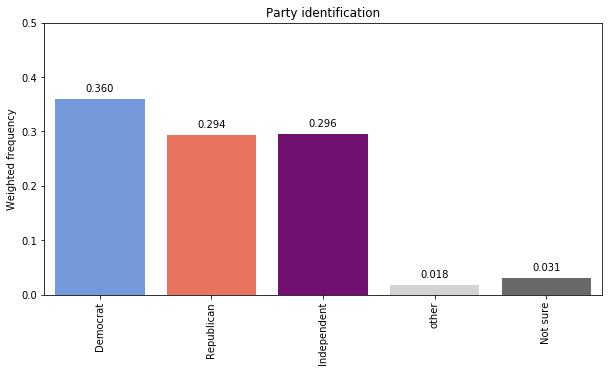

In [10]:
x = party_list
y = party_freq
palette = ['cornflowerblue', 'tomato', 'purple', 'lightgrey', 'dimgrey']
title = 'Party identification'
xlabels = party_list
party_plt = plot_bar(x, y, palette, title, xlabels)

# add labels to bars
for bar in party_plt.patches:
    party_plt.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Determine features correlated with party 

In [11]:
df.corr()['pid3_2016'].sort_values(ascending=False).head()

pid3_2016         1.000000
post_pid3_2012    0.702563
pid3_baseline     0.578848
pid7_2016         0.504512
post_pid7_2012    0.455840
Name: pid3_2016, dtype: float64

## Issue prioritization

In [12]:
scale_x = ['Very','Somewhat','Not very','Unimportant','No Response']

Plot issue by importance

In [13]:
pattern = '(imiss_).{1}(_2016)'
col_list = filter_col_with_regex(df, pattern)
print(col_list)

['imiss_a_2016', 'imiss_b_2016', 'imiss_c_2016', 'imiss_d_2016', 'imiss_e_2016', 'imiss_f_2016', 'imiss_g_2016', 'imiss_h_2016', 'imiss_i_2016', 'imiss_j_2016', 'imiss_k_2016', 'imiss_l_2016', 'imiss_m_2016', 'imiss_n_2016', 'imiss_o_2016', 'imiss_p_2016', 'imiss_q_2016', 'imiss_r_2016', 'imiss_s_2016', 'imiss_t_2016', 'imiss_u_2016', 'imiss_x_2016', 'imiss_y_2016']


In [14]:
issues = ['crime', 'the economy', 'immigration', 'the environment', 'religious liberty', 'terrorism', 'gay rights', 'education', 'family and medical leave', 'health care', 'money in politics', 'climate change', 'social security', 'infrastructure investment', 'jobs', 'the budget deficit', 'poverty', 'taxes', 'medicare', 'abortion', 'the size of government', 'racial quality', 'gender equality']
cap = []
for issue in issues:
    cap.append(issue.capitalize())
issues = cap
                   

../src/visualization/visualize.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 5))


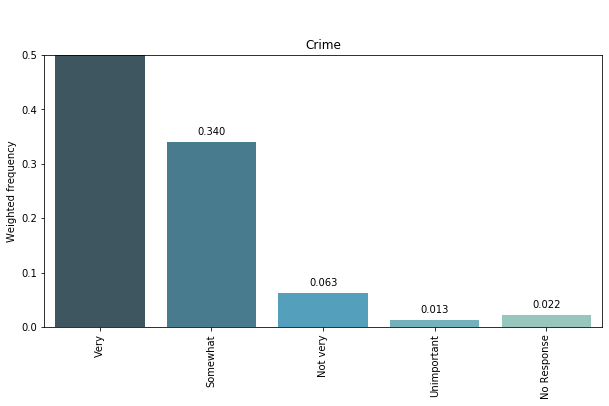

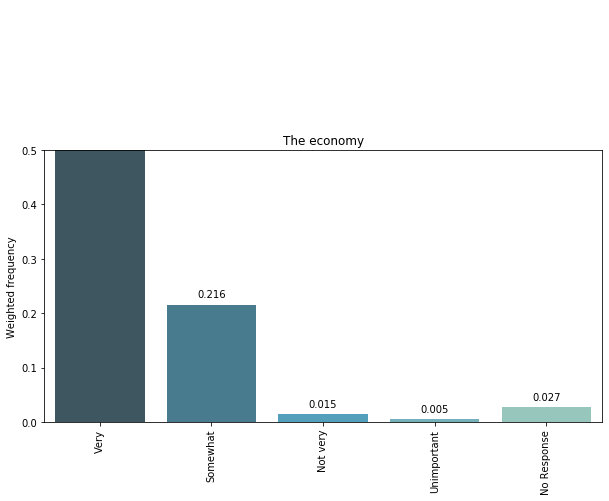

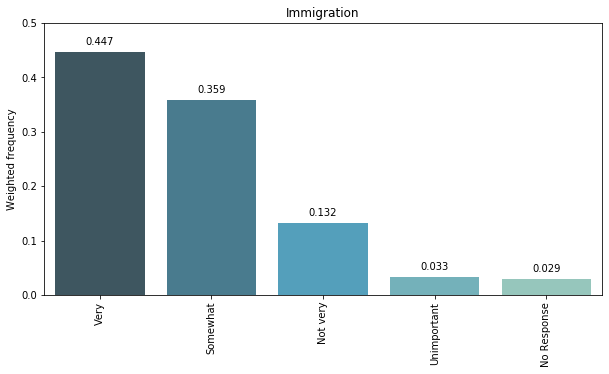

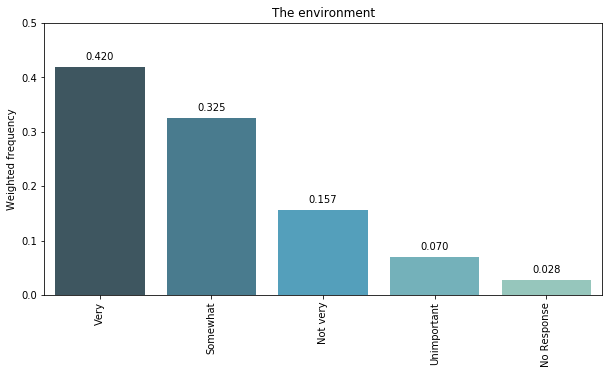

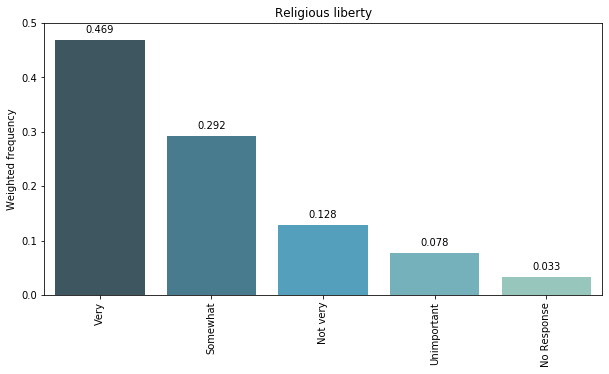

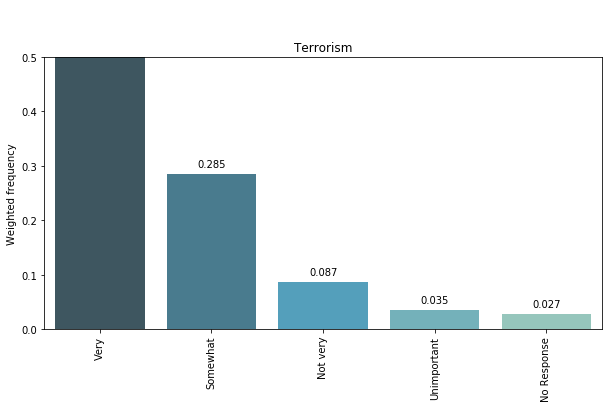

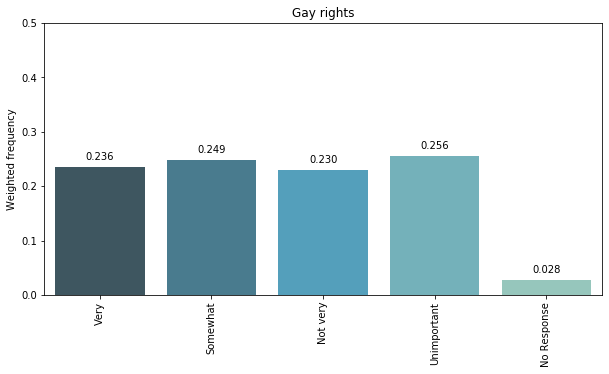

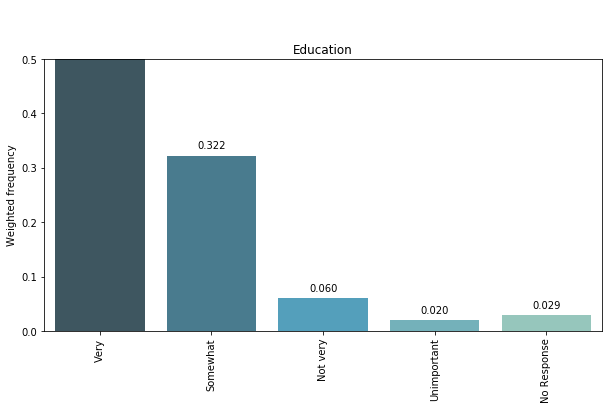

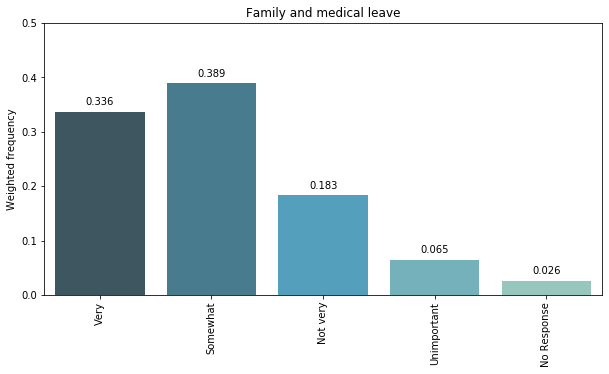

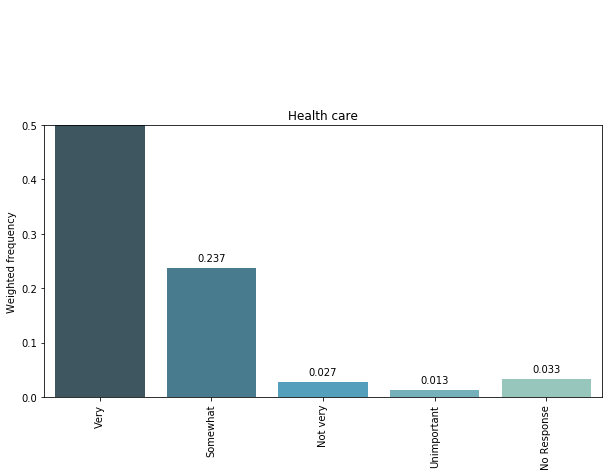

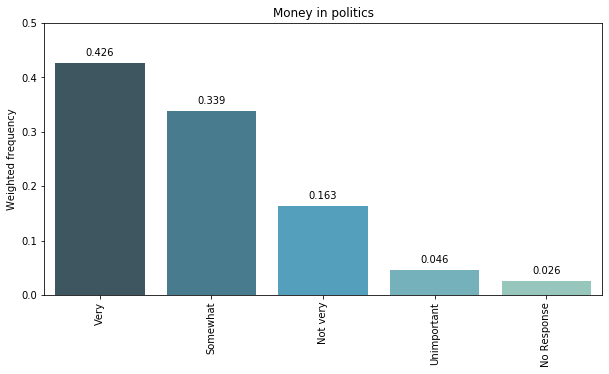

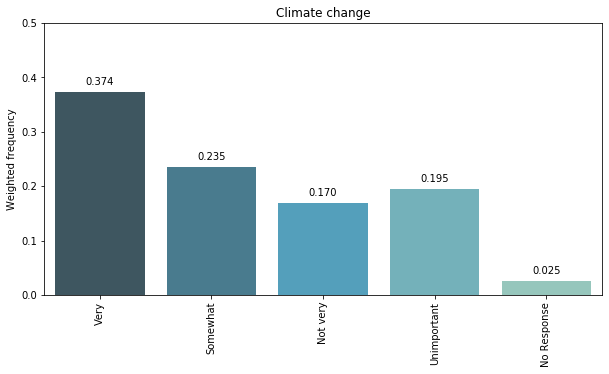

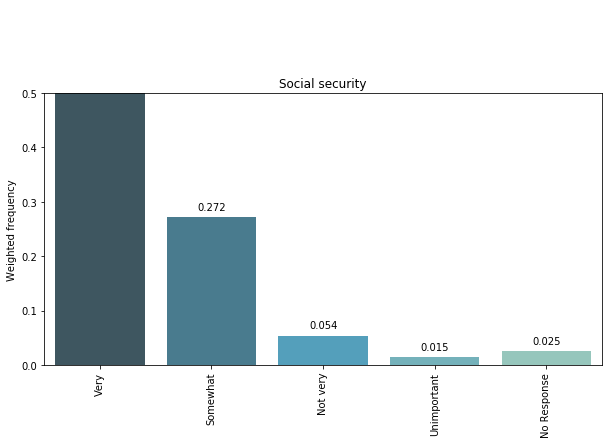

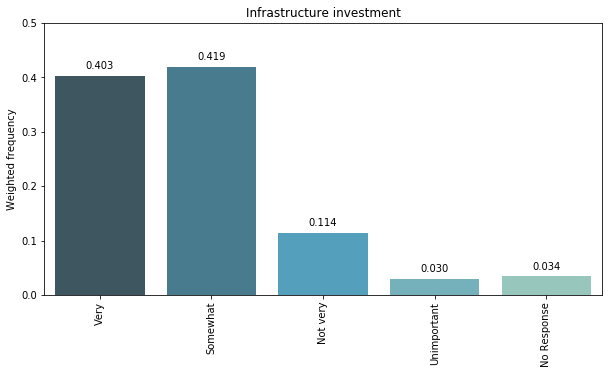

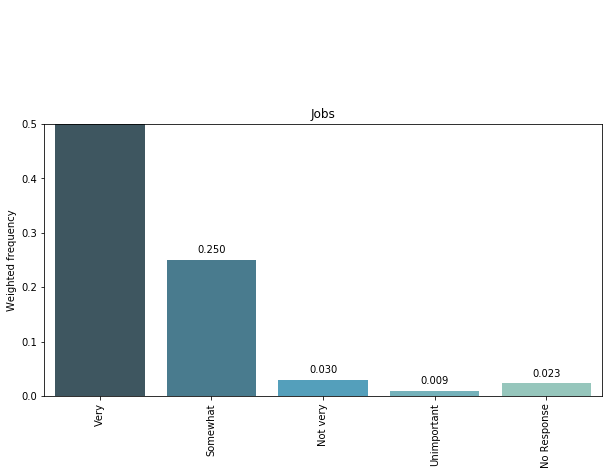

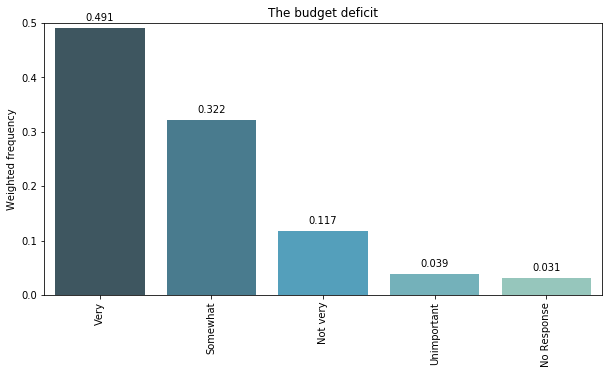

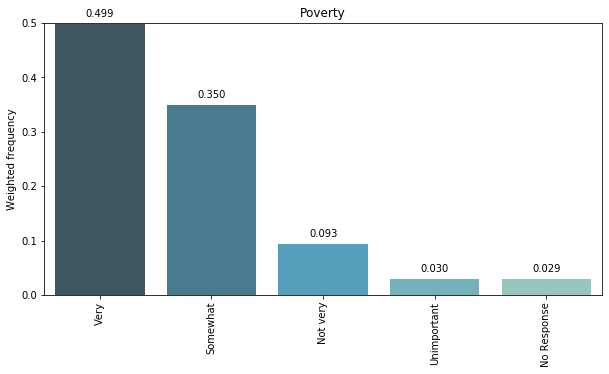

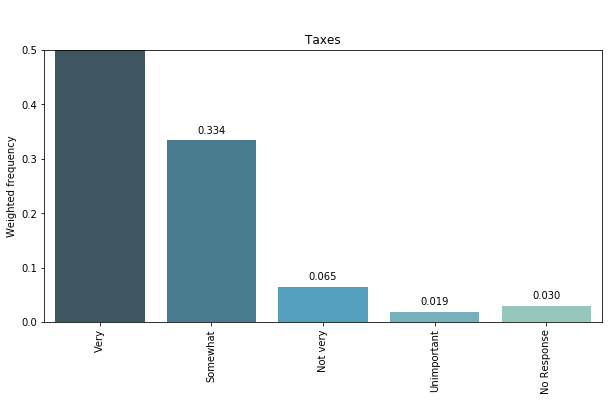

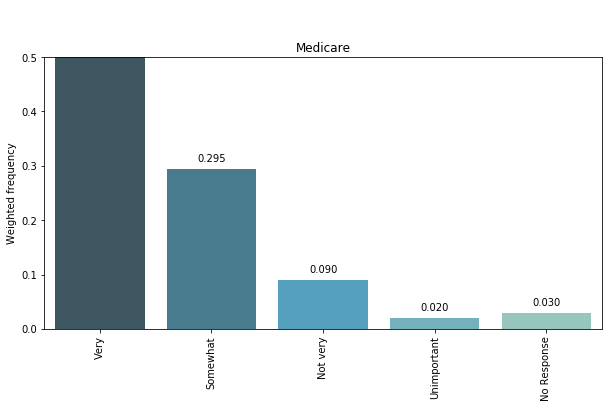

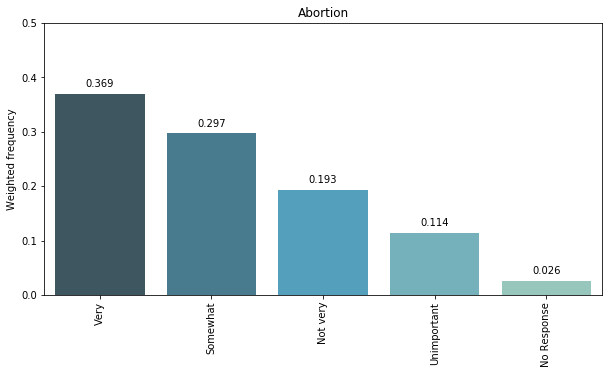

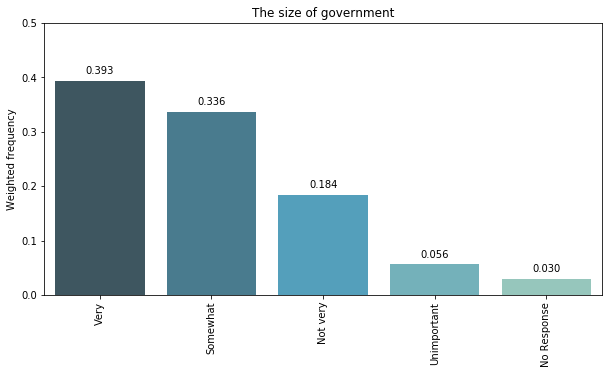

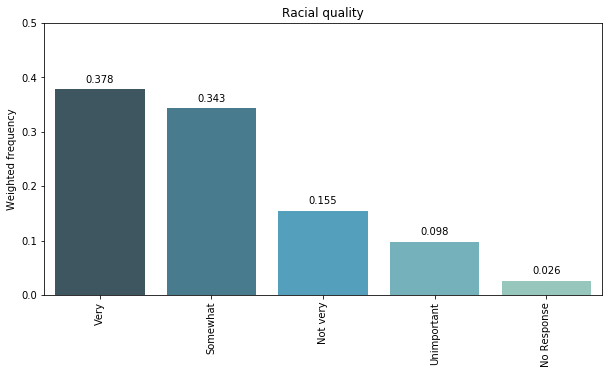

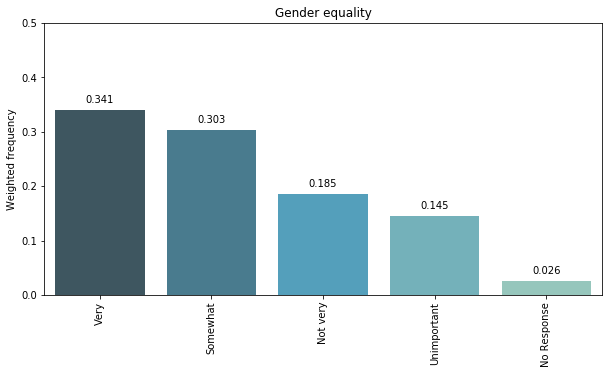

In [15]:
for ind, col in enumerate(col_list):
    freq = calc.distribution(df, col).round(3)
    iss_plt = plot_bar(scale_x, freq, 'GnBu_d', issues[ind], scale_x)
    for iss in iss_plt.patches:
        iss_plt.annotate(format(iss.get_height(), '.3f'), (iss.get_x() + iss.get_width() / 2.,
                                                         iss.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [39]:
jobs_freq = calc.distribution(df, 'imiss_o_2016').round(3)
infra_freq = calc.distribution(df, 'imiss_n_2016').round(3)
gay_freq = calc.distribution(df, 'imiss_g_2016').round(3)
#for iss in iss_plt.patches:
    #iss_plt.annotate(format(iss.get_height(), '.3f'), (iss.get_x() + iss.get_width() / 2.,
    #                                                     iss.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

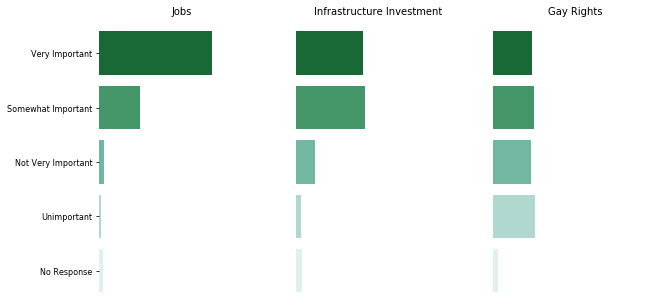

In [155]:
scale_x = ['Very Important','Somewhat Important','Not Very Important','Unimportant','No Response']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
sns.barplot(x = jobs_freq, y = scale_x, palette='BuGn_r' ,ax=ax1)
sns.barplot(x = infra_freq, y = scale_x, palette='BuGn_r' ,ax=ax2)
sns.barplot(x = gay_freq, y = scale_x, palette='BuGn_r' ,ax=ax3)
ax1.set_xlim(0,1)
ax2.set_xlim(0,1)
ax3.set_xlim(0,1)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.tick_params(axis = 'y', labelsize=8)
ax1.set_title('Jobs', fontdict={'fontsize': 10, 'fontweight': 'light'}, y=1.02)
ax2.set_title('Infrastructure Investment', fontdict={'fontsize': 10, 'fontweight': 'light'}, y=1.02)
ax3.set_title('Gay Rights', fontdict={'fontsize': 10, 'fontweight': 'light'}, y=1.02)
#fig.suptitle('How important are these ?', y=1.03, fontsize=13, ha='center')
plt.savefig('../reports/figures/jobs_inf_gay.png')

## Other inquiries

In [184]:
cols = ['faminc_2016', 'marstat_2016', 'child18_2016', 'victim_12mo_2016', 'newsint_2016', 'employ_2016', 'labunmemb_2016', 'milstat_2_2016', 'milstat_1_2016', 'gunown_2016', 'smokenow_2016', 'gender_baseline', 'POLITICAL_CORRECTNESS_2016', 'reverse_discrimination_2016', 'gender_equality_2016', 'race_tryharder_2016', 'sexism1_2016',
        'values_culture_2016', 'envpoll2_2016','presvote16post_2016', 'pew_religimp_2016', 'vote_3cat', 'painkillers_2016', 'healthcov2_2016', 'healthdk_0_2016', 'drugs_2016', 'educ_2016', 'weight', 'alcohol_2016', 'pew_prayer_2016', 'religpew_2016']




In [185]:
df_raw[cols] = df_raw[cols].dropna()

In [186]:
raw_grouped = df_raw[cols].groupby(['vote_3cat'])

In [ ]:
## newsint_2016 showed discrepancy, ## widows with 2 year degree 
## political correctness

## reverse discrimination 

## K Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
plt.figure(figsize=(5, 5))
plt.scatter(kmeans.cluster_centers_[
            :, 0], kmeans.cluster_centers_[:, 1], c='green', s=300)

y_pred = kmeans.predict(X)

In [ ]:
print(round(metrics.silhouette_score(X, labels, metric='euclidean'), 5))
round(metrics.calinski_harabasz_score(X, labels), 5)